Ваша задача в sklearn, используя один из алгоритмов, рассмотренных на паре, построить и обучить классификатор, посчитать метрики качества, построить ROC кривую и посчитайте величину ROC AUC.  - 4 балла

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
curr_dir = os.getcwd()
dirnames = ['aclImdb/test/pos', 'aclImdb/test/neg', 'aclImdb/train/pos', 'aclImdb/train/neg']

In [3]:
filepaths = []

In [4]:
curr_dir = os.getcwd()
filepaths = []
for dirname in dirnames:
    filepath = os.path.join(curr_dir, dirname)
    for root, dirs, files in os.walk(filepath):
        for name in files:
            filepaths.append(os.path.join(root, name))

In [5]:
train = pd.DataFrame(columns=['text', 'filepath', 'connotation'])
test = pd.DataFrame(columns=['text', 'filepath', 'connotation', 'prediction'])

In [6]:
train['filepath'] = [f for f in filepaths if 'train' in f]
test['filepath'] = [f for f in filepaths if 'test' in f]

In [7]:
len(filepaths)

50000

In [8]:
def read_file(f):
    with open(f, 'r', encoding='utf-8') as fl:
        t = fl.read()
    return t

In [9]:
for i, row in train.iterrows():
    row['text'] = read_file(row['filepath'])
    if 'pos' in row['filepath']:
        row['connotation'] = 1
    else:
        row['connotation'] = 0

In [10]:
for i, row in test.iterrows():
    row['text'] = read_file(row['filepath'])
    if 'pos' in row['filepath']:
        row['connotation'] = 1
    else:
        row['connotation'] = 0

In [11]:
train.head()

,text,filepath,connotation
0,Bromwell High is a cartoon comedy. It ran at t...,C:\Users\vital\aclImdb/train/pos\0_9.txt,1
1,Homelessness (or Houselessness as George Carli...,C:\Users\vital\aclImdb/train/pos\10000_8.txt,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,C:\Users\vital\aclImdb/train/pos\10001_10.txt,1
3,This is easily the most underrated film inn th...,C:\Users\vital\aclImdb/train/pos\10002_7.txt,1
4,This is not the typical Mel Brooks film. It wa...,C:\Users\vital\aclImdb/train/pos\10003_8.txt,1


In [12]:
train.to_csv('train.csv')
test.to_csv('test.csv')

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
count_vect = CountVectorizer()

In [15]:
train_counts = count_vect.fit_transform(train['text'])

In [16]:
test_counts = count_vect.transform(test['text'])

In [17]:
clf = LogisticRegression()
clf.fit(train_counts, pd.to_numeric(train.connotation))

C:\Users\vital\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:430: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  warnings.warn("Default solver will be changed to 'lbfgs' in 0.22. "


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
predicted = clf.predict(test_counts)

In [19]:
predicted

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [21]:
true = pd.to_numeric(test.connotation)

In [83]:
acc = accuracy_score(true, predicted)
f1 = f1_score(true, predicted)
p = precision_score(true, predicted)
r = recall_score(true, predicted)
print('acc={0:1.4f}'.format(acc))
print('F1={0:1.4f}, Precision={1:1.4f}, Recall={2:1.4f}'.format(f1, p, r))

acc=0.8668
F1=0.8657, Precision=0.8728, Recall=0.8587


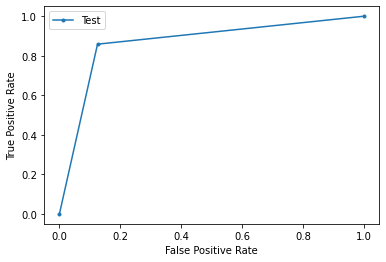

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot

fpr, tpr, thrhld = roc_curve(true, predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [24]:
print('Величина ROC AUC: ', roc_auc_score(true, predicted))

Величина ROC AUC:  0.86676


Используя предсказания вероятностей класса, найдите 15 самых негативных и самых позитивных рецензий по мнению модели.  - 3 балла

In [26]:
clf.classes_

array([0, 1], dtype=int64)

In [45]:
test['prediction'] = list(clf.predict_proba(test_counts))

In [47]:
test.head()

,text,filepath,connotation,prediction
0,I went and saw this movie last night after bei...,C:\Users\vital\aclImdb/test/pos\0_10.txt,1,"[0.013484931683421575, 0.9865150683165784]"
1,Actor turned director Bill Paxton follows up h...,C:\Users\vital\aclImdb/test/pos\10000_7.txt,1,"[0.000204397006773549, 0.9997956029932265]"
2,As a recreational golfer with some knowledge o...,C:\Users\vital\aclImdb/test/pos\10001_9.txt,1,"[0.023428606961948706, 0.9765713930380513]"
3,"I saw this film in a sneak preview, and it is ...",C:\Users\vital\aclImdb/test/pos\10002_8.txt,1,"[0.024339897721797565, 0.9756601022782024]"
4,Bill Paxton has taken the true story of the 19...,C:\Users\vital\aclImdb/test/pos\10003_8.txt,1,"[2.8591562628021983e-05, 0.999971408437372]"


In [49]:
d_positive = {}
d_negative = {}
for i, row in test.iterrows():
    d_positive[row['text']] = row['prediction'][1]
    d_negative[row['text']] = row['prediction'][0]

In [72]:
print('15 самых позитивных рецензий \n') 
sorted(d_positive.items(), key=lambda x: x[1], reverse=True)[:15]

15 самых позитивных рецензий 



[('The Hand of Death aka Countdown in Kung Fu (1976) is a vastly underrated early work by director John Woo. The film stars Dorian Tan (Tan Tao-liang) and features Jackie Chan, Sammo Hung and James Tien in significant supporting roles. Many people believe, or have been lead to believe by deceptive advertising, that this is a Jackie Chan film. This is not a Jackie Chan film, Dorian Tan is the star but Jackie gives one of his best (most serious) early performances.<br /><br />The Hand of Death is about a Shaolin disciple named Yunfei (Tan) who is sent on a mission to assassinate a Shaolin traitor named Shih Xiaofeng (Tien) and protect a revolutionary named Zhang Yi (Woo). Along his journey Yunfei meets up with a young woodcutter named Tan (Chan) and a disgraced sword fighter (Chang Chung) known as "the wanderer." Both men have suffered at the hands of Shih and want to take revenge. The three team up to defeat Shih and his eight bodyguards and escort the revolutionary to safety.<br /><br 

In [74]:
print('15 самых негативных рецензий \n') 
sorted(d_negative.items(), key=lambda x: x[1], reverse=True)[:15]

15 самых негативных рецензий 



[('BELL WITCH HAUNTING (aka THE HAUNT) is an American horror movie supposedly based on real events that took place during the period 1817 to 1821.<br /><br />This is not to be confused with BELL WITCH: THE MOVIE, a movie starring Betsy Palmer based on the same events. However, I can say that I wish I had seen this other movie instead of the one I saw! I enjoyed Betsy Palmer\'s chilling performance in Friday THE 13TH. As such, I believe that even on a bad day, she\'d pull off a better performance than anyone involved in the travesty known as THE HAUNT.<br /><br />With regard to my heading, this movie is not painful to watch because the content is disturbing. It is painful to watch because it is just downright boring.<br /><br />Reading the positive reviews for this movie, I could only identify three possibilities. The first possibility - these authors were involved in the production in some way. The second possibility - the authors whilst not directly involved were paid to write positiv

Написать свои функции, которые бы считали tp, fp, tn, fn, и возвращали точность, полноту и ф-меру и применить их к результатам, полученным вашими классификаторами (если все сделано правильно, то результаты должны совпадать с полученными  sklearn метриками). - 3 балла

In [78]:
def tp(true, predicted):
    assert len(true) == len(predicted)
    count = 0
    for i in range(len(true)):
        if true[i] == predicted[i] == 1:
            count += 1
    return count

def fp(true, predicted):
    assert len(true) == len(predicted)
    count = 0
    for i in range(len(true)):
        if true[i] == 0 and predicted[i] == 1:
            count += 1
    return count

def tn(true, predicted):
    assert len(true) == len(predicted)
    count = 0
    for i in range(len(true)):
        if true[i] == predicted[i] == 0:
            count += 1
    return count

def fn(true, predicted):
    assert len(true) == len(predicted)
    count = 0
    for i in range(len(true)):
        if true[i] == 1 and predicted[i] == 0:
            count += 1
    return count

In [82]:
precision = tp(true, predicted)/(tp(true, predicted) + fp(true, predicted))
recall = tp(true, predicted)/(tp(true, predicted) + fn(true, predicted))
f2 = 2 * precision * recall / (precision + recall)
acc = (tp(true, predicted) + tn(true, predicted))/(tp(true, predicted) + tn(true, predicted) + fp(true, predicted) + fn(true, predicted))
print('acc={0:1.4f}'.format(acc))
print('F-мера={0:1.4f}, Precision={1:1.4f}, Recall={2:1.4f}'.format(f2, precision, recall))

acc=0.8668
F-мера=0.8657, Precision=0.8728, Recall=0.8587
